In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Movies.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Data_Dictionary.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/LICENSE
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Places.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Spells.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Characters.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Chapters.csv
/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Dialogue.csv


In [2]:
movies = pd.read_csv('/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Movies.csv')

In [3]:
movies.shape

(8, 6)

In [4]:
movies.sample(5)

,Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
3,4,Harry Potter and the Goblet of Fire,2005,157,"$150,000,000","$896,400,000"
0,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,Harry Potter and the Chamber of Secrets,2002,161,"$100,000,000","$880,300,000"
5,6,Harry Potter and the Half-Blood Prince,2009,153,"$250,000,000","$943,200,000"
7,8,Harry Potter and the Deathly Hallows Part 2,2011,130,"$250,000,000","$1,342,000,000"


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie ID      8 non-null      int64 
 1   Movie Title   8 non-null      object
 2   Release Year  8 non-null      int64 
 3   Runtime       8 non-null      int64 
 4   Budget        8 non-null      object
 5   Box Office    8 non-null      object
dtypes: int64(3), object(3)
memory usage: 512.0+ bytes


In [6]:
movies.isnull().sum()

Movie ID        0
Movie Title     0
Release Year    0
Runtime         0
Budget          0
Box Office      0
dtype: int64

In [7]:
#how does data look mathematically
movies.describe()

,Movie ID,Release Year,Runtime
count,8.00000,8.000000,8.000000
mean,4.50000,2006.125000,147.375000
std,2.44949,3.720119,10.363914
min,1.00000,2001.000000,130.000000
25%,2.75000,2003.500000,141.000000
50%,4.50000,2006.000000,149.000000
75%,6.25000,2009.250000,154.000000
max,8.00000,2011.000000,161.000000


In [8]:
movies.duplicated().sum()

0

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


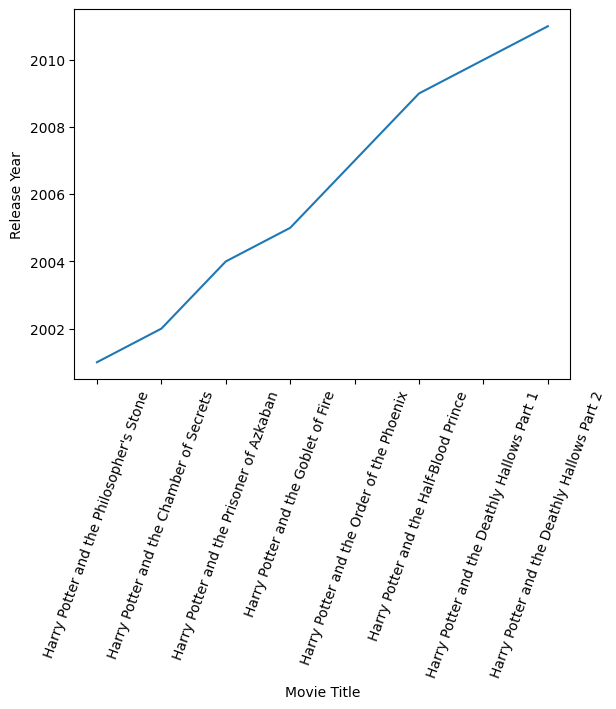

In [10]:
sns.lineplot(x='Movie Title', y='Release Year', data = movies)
plt.xticks(rotation=70)
plt.show()

In [11]:
data_dict = pd.read_csv('/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Data_Dictionary.csv')

In [12]:
data_dict.shape

(31, 3)

In [13]:
data_dict.sample(5)

,Table,Field,Description
4,NaN,Budget,Budget for the movie is US Dollars
11,NaN,Character Name,Name of the character
20,NaN,Place Category,Type of place
0,Movies,Movie ID,Unique identifier for each movie
27,NaN,Chapter ID,Foreign key to match with Chapters table


In [14]:
data_dict.head()

,Table,Field,Description
0,Movies,Movie ID,Unique identifier for each movie
1,NaN,Movie Title,Full movie name
2,NaN,Release Year,Year the movie was released in theaters
3,NaN,Runtime,Length of the movie in minutes
4,NaN,Budget,Budget for the movie is US Dollars


In [15]:
spells=pd.read_csv('/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Spells.csv')

In [16]:
spells.shape

(61, 5)

In [17]:
spells.head()

,Spell ID,Incantation,Spell Name,Effect,Light
0,1,Accio,Summoning Charm,Summons an object,NaN
1,2,Aguamenti,Water-Making Spell,Conjures water,Icy blue
2,3,Alarte Ascendare,Launch an object up into the air,Rockets target upward,Red
3,4,Alohomora,Unlocking Charm,Unlocks target,Blue
4,5,Arania Exumai,Spider repelling spell,Repels spiders,Blue


In [18]:
char=pd.read_csv('/kaggle/input/harry-potter-movies-dataset/Harry_Potter_Movies/Characters.csv',encoding= 'unicode_escape')

In [19]:
char.head()

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
1,2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
2,3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN
